In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
distribution = np.array([0,2,3,3,3,4,13])

In [2]:
mean = np.mean(distribution) # arithmetic mean
mean

4.0

In [3]:
low_than_mean = [mean -i for i in distribution if i < mean]
high_than_mean = [i - mean for i in distribution if i > mean]

In [4]:
"Low:{}, High:{}".format(np.sum(low_than_mean),np.sum(high_than_mean))


'Low:9.0, High:9.0'

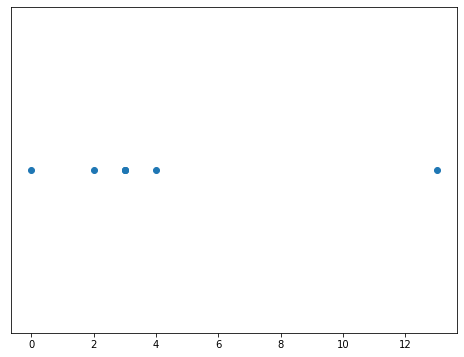

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(distribution,np.zeros(len(distribution)))
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

In [6]:
from numpy.random import randint,seed

In [14]:
equal_distances = 0
for i in range(5000):
    seed(i)
    data = randint(0,1001,10)
    mean = np.mean(data)
    above_mean = round(np.sum([a - mean for a in data if a > mean]),1)
    below_mean = round(np.sum([mean - b for b in data if b < mean]),1)
    if above_mean == below_mean:
        equal_distances += 1
print(equal_distances)
    

5000


---
Population Mean ,$\large \mu $ :
<br>

$$\large \frac{\sum_{i=1}^N x_i}{N} =  \frac{X_1+X_2+...+ X_N}{N}$$

<br>

Sample Mean ,$\large \bar{x} $:


$$\large \frac{\sum_{i=1}^n x_i}{n} = \frac{x_1 + x_2 + ... + x_n}{n}$$

In [17]:
distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]

In [18]:
def pop_mean(lst):
    total = sum(lst)
    return total/len(lst)

In [19]:
pop_mean(distribution_1)

27.25

In [20]:
pop_mean(distribution_2)

46.857142857142854

In [21]:
pop_mean(distribution_3)

8.714285714285714

In [22]:
def pop_mean(arr):
    total = 0
    for i in arr:
        total += i
    return total/len(arr)

In [31]:
df = pd.read_table('AmesHousing_1.txt',sep='\t')

In [32]:
df['SalePrice'].value_counts()

135000    34
140000    33
130000    29
155000    28
145000    26
          ..
256300     1
274725     1
332200     1
57625      1
169985     1
Name: SalePrice, Length: 1032, dtype: int64

In [34]:
df['SalePrice'].mean()

180796.0600682594

In [37]:
pop_mean(df['SalePrice'].tolist())

180796.0600682594

---
# Population Mean , Sample Mean 


* **Sampling Error** = **Parameter** - **Statistics**
* **Parameter** = **Population Mean** = $\mu$
* **Statistics** = **Sample Mean** = $\bar{x}$

<center>
$\large Sampling Error$ = $\large \mu$ - $\large \bar{x}$
</center>
    
* Sample Mean > Population Mean , Overestimates , Sampling Error occurs
* Sample Mean < Population Mean , Underestimates , Sampling Error occurs
* Sample Mean == Population Mean 



* to reduce the sampling error:
    > Sample representativity — the more representative a sample is $\bar{x}$, the closer  will be to $\mu$ .
    
    > Sample size — the larger the sample, the more chances we have to get a representative sample. By consequence, this means less sampling error

In [61]:
sample_size = 5
sampling_error = []
sampling_inc = []
for i in range(0,101):
    sample = df['SalePrice'].sample(sample_size,random_state=i)
    sample_mean = sample.mean()
    sampling_inc.append(sample_size)
    sampling_error.append(df['SalePrice'].mean() - sample_mean)
    sample_size += 29
    

Text(0, 0.5, 'Sampling error')

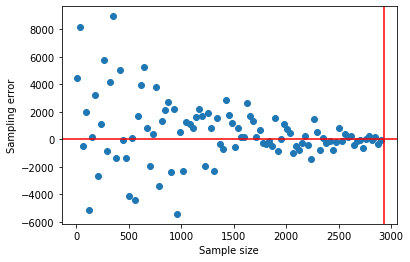

In [62]:
plt.scatter(sampling_inc,sampling_error)
plt.axhline(0,c='red')
plt.axvline(2930,c='red')
plt.xlabel('Sample size')
plt.ylabel('Sampling error')

In [93]:
sampling_arr = np.array(list(zip(sampling_inc,sampling_error)))

In [99]:
with_error = sampling_arr[(sampling_arr[:,1] > -100)&(sampling_arr[:,1] < 100)]

Text(0, 0.5, 'Sampling error')

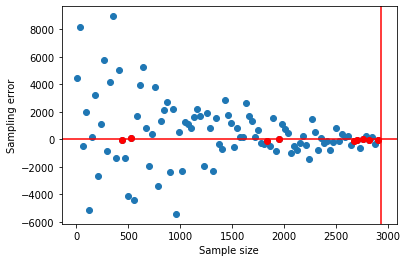

In [105]:
plt.scatter(sampling_inc,sampling_error)
plt.scatter(with_error[:,0].tolist(),with_error[:,1].tolist(),c='red')
plt.axhline(0,c='red')
plt.axvline(2930,c='red')
plt.xlabel('Sample size')
plt.ylabel('Sampling error')

sampling error is to decrease as the sample size increases. 
however there are cases where small sample sizes (100-500 sample points) gave us better estimates for the population mean  than large sample sizes (2500 sample points or more) did.


use case :

In [108]:
sample_means = []
for i in range(10000):
    sample = df['SalePrice'].sample(3,random_state=i)
    sample_means.append(sample.mean())



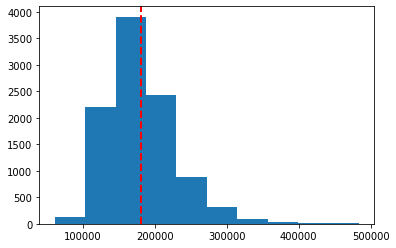

In [109]:
plt.hist(sample_means)
plt.axvline(df['SalePrice'].mean(),c='red',linewidth=2,linestyle='--')

sample means cluster around the population mean

In [110]:
sum(sample_means)/len(sample_means) # sample mean

180824.7253000002

In [113]:
df['SalePrice'].mean() # pop mean

180796.0600682594

In [114]:
samp_means = []
for i in range(10000):
    sample = df['SalePrice'].sample(100,random_state=i)
    samp_means.append(sample.mean())

(0, 500000)

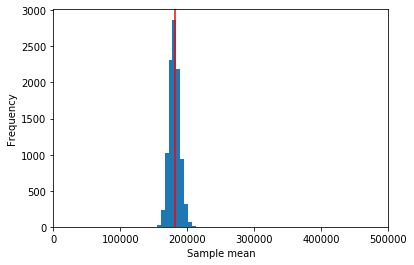

In [118]:
plt.hist(samp_means)
plt.axvline(df['SalePrice'].mean(),c='red')
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0,500000)

In [119]:

population = [3, 7, 2]
samples = [[3, 7], [3, 2],
           [7, 2], [7, 3],
           [2, 3], [2, 7]
          ]

sample_means = []
for sample in samples:
    sample_means.append(sum(sample) / len(sample))
    
population_mean = sum(population) / len(population)
mean_of_sample_means = sum(sample_means) / len(sample_means)

unbiased = (population_mean == mean_of_sample_means)

In [120]:
unbiased

True